## Download and install Spark

## Downloading and preprocessing Austin's Reported Crime Data

In [2]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import time
import datetime
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("https://data.austintexas.gov/api/views/tyfh-5r8s/rows.csv")
df.head()

C:\Users\yingl\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (2,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Trip ID                     Membership Type Bicycle ID Checkout Date  \
0  9900285854        Annual (San Antonio B-cycle)      207.0    10/26/2014   
1  9900285855      24-Hour Kiosk (Austin B-cycle)      969.0    10/26/2014   
2  9900285856  Annual Membership (Austin B-cycle)      214.0    10/26/2014   
3  9900285857      24-Hour Kiosk (Austin B-cycle)      745.0    10/26/2014   
4  9900285858      24-Hour Kiosk (Austin B-cycle)      164.0    10/26/2014   

  Checkout Time  Checkout Kiosk ID  \
0      13:12:00             2537.0   
1      13:12:00             2498.0   
2      13:12:00             2537.0   
3      13:12:00                NaN   
4      13:12:00             2538.0   

                                      Checkout Kiosk Return Kiosk ID  \
0                                     West & 6th St.          2707.0   
1            Convention Center / 4th St. @ MetroRail          2566.0   
2                                     West & 6th St.          2496.0   
3  Zilker Park at Barton Springs & William Barton...             NaN   
4                    Bullock Museum @ Congress & MLK             NaN   

                                        Return Kiosk  Trip Duration Minutes  \
0                               Rainey St @ Cummings                     76   
1                      Pfluger Bridge @ W 2nd Street                     58   
2                                     8th & Congress                      8   
3  Zilker Park at Barton Springs & William Barton...                     28   
4                   Convention Center/ 3rd & Trinity                     15   

   Month    Year  
0   10.0  2014.0  
1   10.0  2014.0  
2   10.0  2014.0  
3   10.0  2014.0  
4   10.0  2014.0

In [6]:
df.describe()

Trip ID  Checkout Kiosk ID  Trip Duration Minutes          Month  \
count  1.264113e+06       1.240959e+06           1.264113e+06  618479.000000   
mean   2.774472e+09       2.907205e+03           3.001667e+01       5.887185   
std    4.433325e+09       5.850821e+02           1.368923e+02       3.206358   
min    8.269930e+06       1.001000e+03           0.000000e+00       1.000000   
25%    1.596514e+07       2.537000e+03           6.000000e+00       3.000000   
50%    1.801923e+07       2.567000e+03           1.200000e+01       5.000000   
75%    9.900037e+09       3.619000e+03           2.700000e+01       9.000000   
max    9.900353e+09       4.062000e+03           3.423800e+04      12.000000   

                Year  
count  618479.000000  
mean     2015.340026  
std         1.019771  
min      2013.000000  
25%      2014.000000  
50%      2015.000000  
75%      2016.000000  
max      2017.000000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1264113 entries, 0 to 1264112
Data columns (total 12 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Trip ID                1264113 non-null  int64  
 1   Membership Type        1257588 non-null  object 
 2   Bicycle ID             1263390 non-null  object 
 3   Checkout Date          1264113 non-null  object 
 4   Checkout Time          1264113 non-null  object 
 5   Checkout Kiosk ID      1240959 non-null  float64
 6   Checkout Kiosk         1264113 non-null  object 
 7   Return Kiosk ID        1239690 non-null  object 
 8   Return Kiosk           1264113 non-null  object 
 9   Trip Duration Minutes  1264113 non-null  int64  
 10  Month                  618479 non-null   float64
 11  Year                   618479 non-null   float64
dtypes: float64(3), int64(2), object(7)
memory usage: 115.7+ MB


In [12]:
mt = mt.drop("Month", "Year")

In [13]:
mt.printSchema()

root
 |-- Trip ID: string (nullable = true)
 |-- Membership Type: string (nullable = true)
 |-- Bicycle ID: string (nullable = true)
 |-- Checkout Date: string (nullable = true)
 |-- Checkout Time: string (nullable = true)
 |-- Checkout Kiosk ID: string (nullable = true)
 |-- Checkout Kiosk: string (nullable = true)
 |-- Return Kiosk ID: string (nullable = true)
 |-- Return Kiosk: string (nullable = true)
 |-- Trip Duration Minutes: string (nullable = true)



In [ ]:
from pyspark.sql.types import StructType, StructField, StringType, TimestampType, BooleanType, DoubleType, IntegerType

In [ ]:
labels = [
    ('Trip ID',StringType()),
    ('Membership Type',StringType()),
    ('Bicycle ID',StringType()),
    ('Checkout Date',StringType()),
    ('Checkout Time',StringType()),
    ('Checkout Kiosk ID',StringType()),
    ('Checkout Kiosk',StringType()),
    ('Return Kiosk ID',StringType()),
    ('Return Kiosk',StringType()),
    ('Trip Duration Minutes',IntegerType()),
    ('Month',IntegerType()),
    ('Year',IntegerType()),
 ]

In [ ]:
schema = StructType([StructField(x[0],x[1],True) for x in labels])
schema

StructType(List(StructField(Trip ID,StringType,true),StructField(Membership Type,StringType,true),StructField(Bicycle ID,StringType,true),StructField(Checkout Date,StringType,true),StructField(Checkout Time,StringType,true),StructField(Checkout Kiosk ID,StringType,true),StructField(Checkout Kiosk,StringType,true),StructField(Return Kiosk ID,StringType,true),StructField(Return Kiosk,StringType,true),StructField(Trip Duration Minutes,IntegerType,true),StructField(Month,IntegerType,true),StructField(Year,IntegerType,true)))

In [ ]:
mt = spark.read.csv('Austin-MetroBike-Trips.csv',header=True, schema=schema)
mt.show(5)

+----------+--------------------+----------+-------------+-------------+-----------------+--------------------+---------------+--------------------+---------------------+-----+----+
|   Trip ID|     Membership Type|Bicycle ID|Checkout Date|Checkout Time|Checkout Kiosk ID|      Checkout Kiosk|Return Kiosk ID|        Return Kiosk|Trip Duration Minutes|Month|Year|
+----------+--------------------+----------+-------------+-------------+-----------------+--------------------+---------------+--------------------+---------------------+-----+----+
|9900285854|Annual (San Anton...|       207|   10/26/2014|     13:12:00|             2537|      West & 6th St.|           2707|Rainey St @ Cummings|                   76|   10|2014|
|9900285855|24-Hour Kiosk (Au...|       969|   10/26/2014|     13:12:00|             2498|Convention Center...|           2566|Pfluger Bridge @ ...|                   58|   10|2014|
|9900285856|Annual Membership...|       214|   10/26/2014|     13:12:00|             2537|

In [ ]:
!ls

Austin-MetroBike-Trips.csv  spark-3.1.1-bin-hadoop3.2
sample_data		    spark-3.1.1-bin-hadoop3.2.tgz


## **Exploratory Analysis**
Display only the first 5 rows of the column name Highest Offense Code

In [ ]:
mt.select('Membership Type').show(5)

+--------------------+
|     Membership Type|
+--------------------+
|Annual (San Anton...|
|24-Hour Kiosk (Au...|
|Annual Membership...|
|24-Hour Kiosk (Au...|
|24-Hour Kiosk (Au...|
+--------------------+
only showing top 5 rows



In [ ]:
mt.select(col('Checkout Kiosk ID')).show(5)

+-----------------+
|Checkout Kiosk ID|
+-----------------+
|             2537|
|             2498|
|             2537|
|             null|
|             2538|
+-----------------+
only showing top 5 rows



In [ ]:
mt.select('Trip ID', 'Trip Duration Minutes').show(5)

+----------+---------------------+
|   Trip ID|Trip Duration Minutes|
+----------+---------------------+
|9900285854|                   76|
|9900285855|                   58|
|9900285856|                    8|
|9900285857|                   28|
|9900285858|                   15|
+----------+---------------------+
only showing top 5 rows



**Add a column with name One, with entries all 1s**

In [ ]:
from pyspark.sql.functions import lit

In [ ]:
mt1 = mt.withColumn('City',lit("Austin")).show(5)

+----------+--------------------+----------+-------------+-------------+-----------------+--------------------+---------------+--------------------+---------------------+-----+----+------+
|   Trip ID|     Membership Type|Bicycle ID|Checkout Date|Checkout Time|Checkout Kiosk ID|      Checkout Kiosk|Return Kiosk ID|        Return Kiosk|Trip Duration Minutes|Month|Year|  City|
+----------+--------------------+----------+-------------+-------------+-----------------+--------------------+---------------+--------------------+---------------------+-----+----+------+
|9900285854|Annual (San Anton...|       207|   10/26/2014|     13:12:00|             2537|      West & 6th St.|           2707|Rainey St @ Cummings|                   76|   10|2014|Austin|
|9900285855|24-Hour Kiosk (Au...|       969|   10/26/2014|     13:12:00|             2498|Convention Center...|           2566|Pfluger Bridge @ ...|                   58|   10|2014|Austin|
|9900285856|Annual Membership...|       214|   10/26/20

# Working with rows
#### add the reported crimes for an additional day, 12-Jan_2020, to our dataset. 

In [ ]:
!ls -l

total 362140
-rw-r--r--  1 root root 142094609 Aug 19  2020 Austin-MetroBike-Trips.csv
drwxr-xr-x  1 root root      4096 Mar 18 13:36 sample_data
drwxr-xr-x 13 1000 1000      4096 Feb 22 02:11 spark-3.1.1-bin-hadoop3.2
-rw-r--r--  1 root root 228721937 Feb 22 02:45 spark-3.1.1-bin-hadoop3.2.tgz


In [ ]:
one_day = spark.read.csv('Austin-MetroBike-Trips.csv',header=True).withColumn('Checkout Date',to_timestamp(col('Checkout Date'),'MM/dd/yyyy')).filter(col('Checkout Date') == lit('2020-03-10'))

In [ ]:
one_day.count()

418

In [ ]:
mt.union(one_day).orderBy('Checkout Date', ascending=False).show(5)

+--------+--------------------+----------+-------------------+-------------+-----------------+---------------+---------------+------------------+---------------------+-----+----+
| Trip ID|     Membership Type|Bicycle ID|      Checkout Date|Checkout Time|Checkout Kiosk ID| Checkout Kiosk|Return Kiosk ID|      Return Kiosk|Trip Duration Minutes|Month|Year|
+--------+--------------------+----------+-------------------+-------------+-----------------+---------------+---------------+------------------+---------------------+-----+----+
|21672576|            Local365|      218G|2020-03-10 00:00:00|      8:34:44|             2501|      5th/Bowie|           2552|          3rd/West|                    2| null|null|
|21676189|            Local365|      1517|2020-03-10 00:00:00|     18:53:15|             2501|      5th/Bowie|           2501|         5th/Bowie|                   16| null|null|
|21676054| Local365+Guest Pass|     19693|2020-03-10 00:00:00|     18:28:57|             2707|Rainey/Cumm

In [ ]:
mt.count()

1264113

In [ ]:
mt.groupBy('Year').count().orderBy('count',ascending=False).show()

+----+------+
|Year| count|
+----+------+
|null|645634|
|2016|184680|
|2015|184521|
|2014|155703|
|2017| 92118|
|2013|  1457|
+----+------+



In [ ]:
mt.select('Membership Type').distinct().show()

+--------------------+
|     Membership Type|
+--------------------+
|              Annual|
|Local365 Youth (a...|
|24-Hour Membershi...|
| Semester Membership|
|Annual (Madison B...|
|Annual (Cincy Red...|
|Annual (Nashville...|
|        Single Trip |
|Annual Membership...|
|24-Hour-Online (A...|
|   HT Ram Membership|
|     Founding Member|
|Membership: pay o...|
|     Pay-as-you-ride|
|          PROHIBITED|
|    Single Trip Ride|
|Annual Membership...|
|             Local30|
|Annual Pass (30 m...|
|Local365 ($80 plu...|
+--------------------+
only showing top 20 rows



In [ ]:
mt.printSchema()

root
 |-- Trip ID: string (nullable = true)
 |-- Membership Type: string (nullable = true)
 |-- Bicycle ID: string (nullable = true)
 |-- Checkout Date: string (nullable = true)
 |-- Checkout Time: string (nullable = true)
 |-- Checkout Kiosk ID: string (nullable = true)
 |-- Checkout Kiosk: string (nullable = true)
 |-- Return Kiosk ID: string (nullable = true)
 |-- Return Kiosk: string (nullable = true)
 |-- Trip Duration Minutes: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- Year: integer (nullable = true)



In [ ]:
mt.filter(col('Year') == '2014').count()/mt.select('Year').count()

0.12317174176675662

In [ ]:
mt.groupby('Membership Type').count().orderBy('count',ascending=False).show()

+--------------------+------+
|     Membership Type| count|
+--------------------+------+
|             Walk Up|374151|
|U.T. Student Memb...|284687|
|            Local365|205370|
|24-Hour Kiosk (Au...|108672|
|             Local30| 66463|
|           Weekender| 45012|
|Annual Membership...| 30306|
|            Explorer| 25871|
|24 Hour Walk Up Pass| 22658|
| Local365+Guest Pass| 13768|
|        Single Trip | 12068|
|Single Trip (Pay-...|  8664|
|                null|  6525|
|      3-Day Explorer|  6219|
|     Pay-as-you-ride|  5530|
|         Single Trip|  5366|
|Local365 ($80 plu...|  4005|
|     Founding Member|  3550|
|    Single Trip Ride|  3242|
|               7-Day|  3137|
+--------------------+------+
only showing top 20 rows



**Built-in functions**

In [ ]:
from pyspark.sql import functions

In [ ]:
print(dir(functions))

['Column', 'DataFrame', 'DataType', 'PandasUDFType', 'PythonEvalType', 'SparkContext', 'StringType', 'UserDefinedFunction', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_create_column_from_literal', '_create_lambda', '_create_udf', '_get_get_jvm_function', '_get_lambda_parameters', '_invoke_binary_math_function', '_invoke_function', '_invoke_function_over_column', '_invoke_higher_order_function', '_options_to_str', '_test', '_to_java_column', '_to_seq', '_unresolved_named_lambda_variable', 'abs', 'acos', 'acosh', 'add_months', 'aggregate', 'approxCountDistinct', 'approx_count_distinct', 'array', 'array_contains', 'array_distinct', 'array_except', 'array_intersect', 'array_join', 'array_max', 'array_min', 'array_position', 'array_remove', 'array_repeat', 'array_sort', 'array_union', 'arrays_overlap', 'arrays_zip', 'asc', 'asc_nulls_first', 'asc_nulls_last', 'ascii', 'asin', 'asinh', 'assert_true', 'atan', 'atan2', 'atanh', 'a

In [ ]:
from pyspark.sql.functions import lower, upper, substring

In [ ]:
mt.select(lower(col('Checkout Kiosk')),upper(col('Checkout Kiosk')),substring(col('Checkout Kiosk'),1,4)).show(5)

+---------------------+---------------------+-------------------------------+
|lower(Checkout Kiosk)|upper(Checkout Kiosk)|substring(Checkout Kiosk, 1, 4)|
+---------------------+---------------------+-------------------------------+
|       west & 6th st.|       WEST & 6TH ST.|                           West|
| convention center...| CONVENTION CENTER...|                           Conv|
|       west & 6th st.|       WEST & 6TH ST.|                           West|
| zilker park at ba...| ZILKER PARK AT BA...|                           Zilk|
| bullock museum @ ...| BULLOCK MUSEUM @ ...|                           Bull|
+---------------------+---------------------+-------------------------------+
only showing top 5 rows



#Numeric functions
###*Show* the oldest date and the most recent date

In [ ]:
from pyspark.sql.functions import min, max

In [ ]:
mt.select(min(col('Checkout Date')),max(col('Checkout Date'))).show(1)

+------------------+------------------+
|min(Checkout Date)|max(Checkout Date)|
+------------------+------------------+
|        01/01/2014|        12/31/2019|
+------------------+------------------+



#**Date**
###What is 3 days earlier than the olest date and 3 days later than the most recent date?


In [ ]:
from pyspark.sql.functions import date_add,date_sub

In [ ]:
help(date_add)

Help on function date_add in module pyspark.sql.functions:

date_add(start, days)
    Returns the date that is `days` days after `start`
    
    .. versionadded:: 1.5.0
    
    Examples
    --------
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(date_add(df.dt, 1).alias('next_date')).collect()
    [Row(next_date=datetime.date(2015, 4, 9))]



In [ ]:
mt.select(date_sub(min(col('Checkout Date')),3),date_add(max(col('Checkout Date')),3)).show(1)

+-------------------------------+-------------------------------+
|date_sub(min(Checkout Date), 3)|date_add(max(Checkout Date), 3)|
+-------------------------------+-------------------------------+
|                           null|                           null|
+-------------------------------+-------------------------------+



In [ ]:
from pyspark.sql.functions import to_date, to_timestamp, lit

In [ ]:
df = spark.createDataFrame([('2019-12-25 13:30:00',)],['Christmas'])
df.show(1)

+-------------------+
|          Christmas|
+-------------------+
|2019-12-25 13:30:00|
+-------------------+



In [ ]:
df.select(to_date(col('Christmas'),'yyyy-MM-dd HH:mm:ss'), to_timestamp(col('Christmas'),'yyyy-MM-dd HH:mm:ss')).show(1)

+---------------------------------------+--------------------------------------------+
|to_date(Christmas, yyyy-MM-dd HH:mm:ss)|to_timestamp(Christmas, yyyy-MM-dd HH:mm:ss)|
+---------------------------------------+--------------------------------------------+
|                             2019-12-25|                         2019-12-25 13:30:00|
+---------------------------------------+--------------------------------------------+



In [ ]:
df = spark.createDataFrame([('25/Dec/2019 13:30:00',)],['Christmas'])
df.show(1)

+--------------------+
|           Christmas|
+--------------------+
|25/Dec/2019 13:30:00|
+--------------------+



In [ ]:
df.select(to_date(col('Christmas'),'dd/MMM/yyyy HH:mm:ss'),to_timestamp(col('Christmas'),'dd/MMM/yyyy HH:mm:ss')).show(1)

+----------------------------------------+---------------------------------------------+
|to_date(Christmas, dd/MMM/yyyy HH:mm:ss)|to_timestamp(Christmas, dd/MMM/yyyy HH:mm:ss)|
+----------------------------------------+---------------------------------------------+
|                              2019-12-25|                          2019-12-25 13:30:00|
+----------------------------------------+---------------------------------------------+



In [ ]:
df = spark.createDataFrame([('12/25/2019 01:30:00 PM',)],['Christmas'])
df.show(1,truncate=False)

+----------------------+
|Christmas             |
+----------------------+
|12/25/2019 01:30:00 PM|
+----------------------+



In [ ]:
!wget -O Austin-Kiosk-Stations.csv https://data.austintexas.gov/api/views/qd73-bsdg/rows.csv?accessType=DOWNLOAD

--2021-03-29 15:48:03--  https://data.austintexas.gov/api/views/qd73-bsdg/rows.csv?accessType=DOWNLOAD
Resolving data.austintexas.gov (data.austintexas.gov)... 52.206.68.26, 52.206.140.205, 52.206.140.199
Connecting to data.austintexas.gov (data.austintexas.gov)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘Austin-Kiosk-Stations.csv’

Austin-Kiosk-Statio     [ <=>                ]  13.76K  --.-KB/s    in 0s      

2021-03-29 15:48:04 (268 MB/s) - ‘Austin-Kiosk-Stations.csv’ saved [14094]



In [ ]:
!ls -l

total 362188
-rw-r--r--  1 root root     14094 Mar 18 07:05 Austin
-rw-r--r--  1 root root     14094 Mar 18 07:05 Austin-Kiosk-Stations.csv
-rw-r--r--  1 root root     14094 Mar 18 07:05 Austin-MetroBike-Kiosk-Locations.csv
-rw-r--r--  1 root root 142094609 Aug 19  2020 Austin-MetroBike-Trips.csv
drwxr-xr-x  1 root root      4096 Mar 18 13:36 sample_data
drwxr-xr-x 13 1000 1000      4096 Feb 22 02:11 spark-3.1.1-bin-hadoop3.2
-rw-r--r--  1 root root 228721937 Feb 22 02:45 spark-3.1.1-bin-hadoop3.2.tgz


In [ ]:
ks = spark.read.csv('Austin-Kiosk-Stations.csv',header=True)
ks.show(5)
ks.count()

+--------+--------------------+------------+--------------------+--------------------+--------------------+-----------------+-------------+---------------+----------+----------------+---------------+--------------------+----------------+-----+--------------------+
|Kiosk ID|          Kiosk Name|Kiosk Status|            Location|             Address|      Alternate Name|City Asset Number|Property Type|Number of Docks|Power Type|Footprint Length|Footprint Width|               Notes|Council District|Image|       Modified Date|
+--------+--------------------+------------+--------------------+--------------------+--------------------+-----------------+-------------+---------------+----------+----------------+---------------+--------------------+----------------+-----+--------------------+
|    2570|South Congress & ...|      active|(30.25226, -97.74...|1199 S. Congress ...|                null|            16752|     sidewalk|             10|     solar|              20|            7.5|      

98

In [ ]:
ks.select(col('Property Type')).distinct().show(30)

+--------------------+
|       Property Type|
+--------------------+
|                null|
|undetermined_parking|
|            sidewalk|
|  nonmetered_parking|
|            parkland|
|        paid_parking|
|                    |
+--------------------+



In [ ]:
ks.select('Number of Docks').distinct().show(30)

+---------------+
|Number of Docks|
+---------------+
|             15|
|             11|
|             22|
|             16|
|              0|
|           null|
|             18|
|             17|
|             19|
|              9|
|             10|
|             12|
|             13|
|             14|
+---------------+



In [ ]:
from pyspark.sql.functions import lpad

In [ ]:
help(lpad)

Help on function lpad in module pyspark.sql.functions:

lpad(col, len, pad)
    Left-pad the string column to width `len` with `pad`.
    
    .. versionadded:: 1.5.0
    
    Examples
    --------
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(lpad(df.s, 6, '#').alias('s')).collect()
    [Row(s='##abcd')]



In [ ]:
ks.select(lpad(col('Property Type'),6,'0')).show()

+-------------------------+
|lpad(Property Type, 6, 0)|
+-------------------------+
|                   sidewa|
|                   sidewa|
|                   parkla|
|                   parkla|
|                   parkla|
|                   parkla|
|                   sidewa|
|                   undete|
|                   undete|
|                   sidewa|
|                   undete|
|                   nonmet|
|                   sidewa|
|                   undete|
|                   paid_p|
|                   undete|
|                   undete|
|                   sidewa|
|                   paid_p|
|                   sidewa|
+-------------------------+
only showing top 20 rows



In [ ]:
ks = ks.withColumn('Format_Property_Type',lpad(col('Property Type'),3,'0'))
ks.show(5)

+--------+--------------------+------------+--------------------+--------------------+--------------------+-----------------+-------------+---------------+----------+----------------+---------------+--------------------+----------------+-----+--------------------+--------------------+
|Kiosk ID|          Kiosk Name|Kiosk Status|            Location|             Address|      Alternate Name|City Asset Number|Property Type|Number of Docks|Power Type|Footprint Length|Footprint Width|               Notes|Council District|Image|       Modified Date|Format_Property_Type|
+--------+--------------------+------------+--------------------+--------------------+--------------------+-----------------+-------------+---------------+----------+----------------+---------------+--------------------+----------------+-----+--------------------+--------------------+
|    2570|South Congress & ...|      active|(30.25226, -97.74...|1199 S. Congress ...|                null|            16752|     sidewalk|   

In [ ]:
ks.join(ps, rc.District == ps.Format_district, 'left_outer').show()

+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+--------+--------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|      ID|Case Number|               Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|DISTRICT| DISTRICT NAME|             ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|Format_distri

In [ ]:
ps.columns

['DISTRICT',
 'DISTRICT NAME',
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'Format_district']

In [ ]:
rc.join(ps, rc.District == ps.Format_district, 'left_outer').drop(
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION', 
).show()

+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+--------------+---------------+
|      ID|Case Number|               Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|Year|          Updated On|DISTRICT| DISTRICT NAME|Format_district|
+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+--------------+---------------+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|           BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     009|  12|            61|     08B|2015|02/10/2018 03:50:...|       9|       Deeri

## Challenge questions

**What is the most frequently reported non-criminal activity?**

In [ ]:
rc.cache()
rc.count()

6754001

In [ ]:
rc.show(5)

+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     00

In [ ]:
rc.select(col('Primary Type')).distinct().count()

36

In [ ]:
rc.select(col('Primary Type')).distinct().orderBy(col('Primary Type')).show(35, truncate=False)

+---------------------------------+
|Primary Type                     |
+---------------------------------+
|ARSON                            |
|ASSAULT                          |
|BATTERY                          |
|BURGLARY                         |
|CONCEALED CARRY LICENSE VIOLATION|
|CRIM SEXUAL ASSAULT              |
|CRIMINAL DAMAGE                  |
|CRIMINAL SEXUAL ASSAULT          |
|CRIMINAL TRESPASS                |
|DECEPTIVE PRACTICE               |
|DOMESTIC VIOLENCE                |
|GAMBLING                         |
|HOMICIDE                         |
|HUMAN TRAFFICKING                |
|INTERFERENCE WITH PUBLIC OFFICER |
|INTIMIDATION                     |
|KIDNAPPING                       |
|LIQUOR LAW VIOLATION             |
|MOTOR VEHICLE THEFT              |
|NARCOTICS                        |
|NON - CRIMINAL                   |
|NON-CRIMINAL                     |
|NON-CRIMINAL (SUBJECT SPECIFIED) |
|OBSCENITY                        |
|OFFENSE INVOLVING CHILDREN 

In [ ]:
nc = rc.filter( (col('Primary Type') == 'NON - CRIMINAL') | (col('Primary Type') == 'NON-CRIMINAL') | (col('Primary Type') == 'NON-CRIMINAL (SUBJECT SPECIFIED)'))
nc.show(50)

+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10233370|   HY421530|2015-09-13 10:45:00|  010XX S MENARD AVE|5114|      NON - CRIMINAL|   FOID - REVOCATION|           RESIDE

In [ ]:
nc.groupBy(col('Description')).count().orderBy('count',ascending=False).show(truncate=False)

+-------------------------------------------+-----+
|Description                                |count|
+-------------------------------------------+-----+
|LOST PASSPORT                              |107  |
|FOID - REVOCATION                          |75   |
|NOTIFICATION OF CIVIL NO CONTACT ORDER     |9    |
|NOTIFICATION OF STALKING - NO CONTACT ORDER|8    |
|CONCEALED CARRY LICENSE REVOCATION         |4    |
|FOUND PASSPORT                             |4    |
|GUN OFFENDER NOTIFICATION-NO CONTACT       |3    |
+-------------------------------------------+-----+



**Using a bar chart, plot which day of the week has the most number of reported crime. 
**

In [ ]:
from pyspark.sql.functions import dayofweek

In [ ]:
help(dayofweek)

Help on function dayofweek in module pyspark.sql.functions:

dayofweek(col)
    Extract the day of the week of a given date as integer.
    
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(dayofweek('dt').alias('day')).collect()
    [Row(day=4)]
    
    .. versionadded:: 2.3



In [ ]:
rc.show(5)

+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     00

In [ ]:
rc.select(col('Date'),dayofweek(col('Date'))).show(5)

+-------------------+---------------+
|               Date|dayofweek(Date)|
+-------------------+---------------+
|2015-09-05 13:30:00|              7|
|2015-09-04 11:30:00|              6|
|2018-09-01 00:01:00|              7|
|2015-09-05 12:45:00|              7|
|2015-09-05 13:00:00|              7|
+-------------------+---------------+
only showing top 5 rows



In [ ]:
from pyspark.sql.functions import date_format

In [ ]:
help(date_format)

Help on function date_format in module pyspark.sql.functions:

date_format(date, format)
    Converts a date/timestamp/string to a value of string in the format specified by the date
    format given by the second argument.
    
    A pattern could be for instance `dd.MM.yyyy` and could return a string like '18.03.1993'. All
    pattern letters of `datetime pattern`_. can be used.
    
    .. _datetime pattern: https://spark.apache.org/docs/latest/sql-ref-datetime-pattern.html
    .. note:: Use when ever possible specialized functions like `year`. These benefit from a
        specialized implementation.
    
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(date_format('dt', 'MM/dd/yyy').alias('date')).collect()
    [Row(date='04/08/2015')]
    
    .. versionadded:: 1.5



In [ ]:
rc.select(col('Date'),dayofweek(col('Date')),date_format(col('Date'),'E')).show(5)

+-------------------+---------------+--------------------+
|               Date|dayofweek(Date)|date_format(Date, E)|
+-------------------+---------------+--------------------+
|2015-09-05 13:30:00|              7|                 Sat|
|2015-09-04 11:30:00|              6|                 Fri|
|2018-09-01 00:01:00|              7|                 Sat|
|2015-09-05 12:45:00|              7|                 Sat|
|2015-09-05 13:00:00|              7|                 Sat|
+-------------------+---------------+--------------------+
only showing top 5 rows



In [ ]:
rc.groupBy(date_format(col('Date'),'E')).count().orderBy('count',ascending=False).show()

+--------------------+-------+
|date_format(Date, E)|  count|
+--------------------+-------+
|                 Fri|1017070|
|                 Wed| 973988|
|                 Tue| 968131|
|                 Sat| 965264|
|                 Thu| 964660|
|                 Mon| 952834|
|                 Sun| 912054|
+--------------------+-------+



In [ ]:
rc.groupBy(date_format(col('Date'),'E')).count().collect()

[Row(date_format(Date, E)='Sun', count=912054),
 Row(date_format(Date, E)='Mon', count=952834),
 Row(date_format(Date, E)='Thu', count=964660),
 Row(date_format(Date, E)='Sat', count=965264),
 Row(date_format(Date, E)='Wed', count=973988),
 Row(date_format(Date, E)='Fri', count=1017070),
 Row(date_format(Date, E)='Tue', count=968131)]

In [ ]:
dow = [x[0] for x in rc.groupBy(date_format(col('Date'),'E')).count().collect() ]
dow

['Sun', 'Mon', 'Thu', 'Sat', 'Wed', 'Fri', 'Tue']

In [ ]:
cnt = [x[1] for x in rc.groupBy(date_format(col('Date'),'E')).count().collect() ]
cnt

[912054, 952834, 964660, 965264, 973988, 1017070, 968131]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
cp = pd.DataFrame({'Day_of_week' : dow, 'Count': cnt})
cp.head(7)

Day_of_week    Count
0         Sun   912054
1         Mon   952834
2         Thu   964660
3         Sat   965264
4         Wed   973988
5         Fri  1017070
6         Tue   968131

Text(0.5, 0, 'Day of reported crimes per day of the week from 2001 to present')

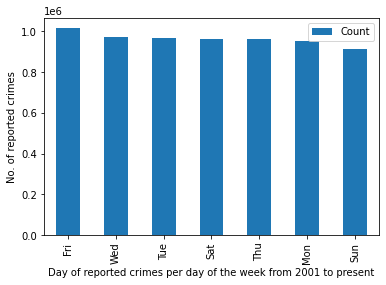

In [ ]:
cp.sort_values('Count', ascending=False).plot(kind='bar', x='Day_of_week', y='Count')
plt.xlabel('Day of the week')
plt.ylabel('No. of reported crimes')
plt.xlabel('Day of reported crimes per day of the week from 2001 to present')

RDDs setup

In [ ]:
psrdd = sc.textFile('police-stations.csv')


In [ ]:
psrdd.first()

Py4JJavaError: ignored

In [ ]:
ps_header = psrdd.first()

Py4JJavaError: ignored

In [ ]:
ps_rest = psrdd.filter(lambda line: line!= ps_header)
ps_rest.first()

Py4JJavaError: ignored